In [1]:
import pandas as pd
pd.set_option('precision', 2)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors_ = plt.get_cmap('Set2')(np.linspace(0, 1, 8))
colors_year = plt.get_cmap('magma')(np.linspace(0.5, 1, 5)[::-1][1:])

from IPython.core.pylabtools import figsize
from IPython.display import display
figsize(8, 5)

%load_ext watermark
%load_ext autoreload
%autoreload 2
%matplotlib inline

%watermark -d -t -u -v -g -r -b -iv -a "Hongsup Shin" 

Author: Hongsup Shin

Last updated: 2021-01-09 15:27:26

Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.19.0

Git hash: 05a3e6fd11d55d0af7102b2715158de7a68f0497

Git repo: https://github.com/texas-justice-initiative/officer_involved_shooting_report_2020.git

Git branch: master

pandas    : 1.2.0
matplotlib: 3.3.3
numpy     : 1.19.5
seaborn   : 0.11.1



# Assessing missing data to identify shooters

**Goals (Jan 2021)**
- We are interested in identifying opportunities to conduct a meaningful investigation on the relationship between shooters and victims in OIS incidents.
- The analysis should be done from both civilian and officer perspectives. In the civilian data, shooters are officers. In the officer data, shooters are civilians.
- Before we make further decisions, we are interested in the quality of the data, especially in terms of whether we have enough information (i.e., not much missing data).

Loading the preprocessed data (2016-2019)

In [2]:
df_cd = pd.read_pickle('../Data/Preprocessed/civilian_shooting_preprocessed.pkl'); print(df_cd.shape)
df_os = pd.read_pickle('../Data/Preprocessed/officer_shooting_preprocessed.pkl'); print(df_os.shape)

(697, 154)
(130, 50)


## 1. Officer information in the civilian data
Officer columns have string `officer_` in their names.

In [3]:
cols_officer = [col for col in df_cd.columns if 'officer_' in col]
print(cols_officer[:10]) # first 10 examples

['officer_age_1', 'officer_race_1', 'officer_gender_1', 'officer_age_2', 'officer_race_2', 'officer_gender_2', 'officer_caused_injury_2', 'officer_age_3', 'officer_race_3', 'officer_gender_3']


Officer demographics is recorded in three types: age, race, and gender.

### Missing data

Number of rows that have missing data per column:

In [4]:
df_cd[cols_officer].isnull().sum()

officer_age_1                0
officer_race_1               0
officer_gender_1             0
officer_age_2              447
officer_race_2             447
officer_gender_2           447
officer_caused_injury_2    645
officer_age_3              574
officer_race_3             574
officer_gender_3           573
officer_caused_injury_3    687
officer_age_4              621
officer_race_4             621
officer_gender_4           621
officer_age_5              656
officer_race_5             656
officer_gender_5           656
officer_age_6              676
officer_race_6             676
officer_gender_6           676
officer_age_7              683
officer_race_7             683
officer_gender_7           683
officer_age_8              690
officer_race_8             690
officer_gender_8           690
officer_age_9              692
officer_race_9             692
officer_gender_9           692
officer_age_10             694
officer_race_10            694
officer_gender_10          694
officer_

- It seems like the OIS report form allows agencies to fill out up to 11 officers. For instance, it starts from `officer_age_1` and goes all the way up to `officer_age_11`.
- Luckily the first officer information doesn't have any missing data.

In [5]:
cols_officer_age = [col for col in df_cd.columns if 'officer_age_' in col]
print(cols_officer_age)

['officer_age_1', 'officer_age_2', 'officer_age_3', 'officer_age_4', 'officer_age_5', 'officer_age_6', 'officer_age_7', 'officer_age_8', 'officer_age_9', 'officer_age_10', 'officer_age_11']


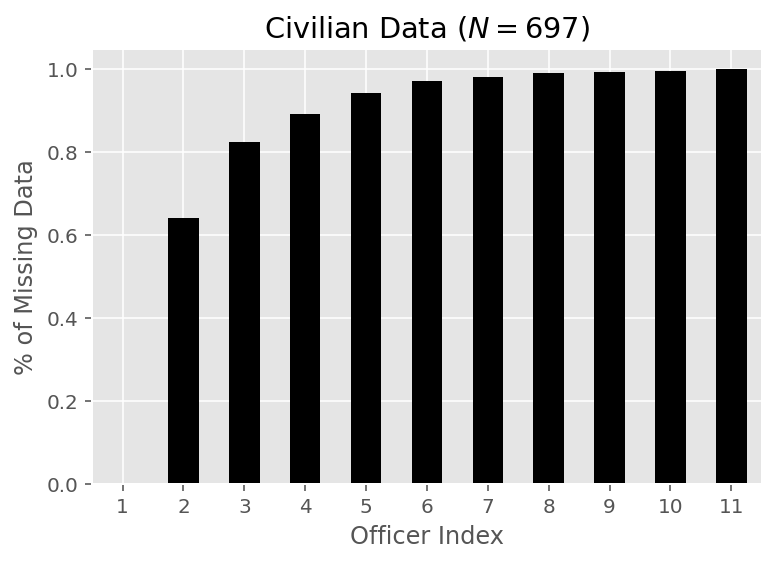

In [6]:
fig, ax = plt.subplots(1, 1)
df_cd[cols_officer_age].isnull().mean().plot(kind='bar', ax=ax, rot=0, color='black')
xticklabels = [s.split('_')[-1] for s in cols_officer_age]
ax.set(ylabel='% of Missing Data', xlabel='Officer Index', xticklabels=xticklabels, 
       title='Civilian Data ($N={}$)'.format(df_cd.shape[0]));

## 2. Civilian information in the officer data

Civilian columns have string `civilian_` in their names.

In [7]:
df_os.shape

(130, 50)

In [8]:
cols_civilian = [col for col in df_os.columns if 'civilian_' in col]
print(np.sort(cols_civilian))

['civilian_age_1' 'civilian_age_2' 'civilian_age_3' 'civilian_gender_1'
 'civilian_gender_2' 'civilian_gender_3' 'civilian_harm'
 'civilian_name_first_1' 'civilian_name_first_2' 'civilian_name_first_3'
 'civilian_name_last_1' 'civilian_name_last_2' 'civilian_name_last_3'
 'civilian_race_1' 'civilian_race_2' 'civilian_race_3' 'civilian_suicide']


In [9]:
df_os[cols_civilian].isnull().sum()

civilian_harm              0
civilian_suicide           0
civilian_name_first_1     26
civilian_name_last_1      25
civilian_age_1            10
civilian_race_1            5
civilian_gender_1          3
civilian_name_first_2    123
civilian_name_last_2     123
civilian_age_2           121
civilian_race_2          121
civilian_gender_2        121
civilian_name_first_3    130
civilian_name_last_3     130
civilian_age_3           129
civilian_race_3          129
civilian_gender_3        129
dtype: int64

- Comparison with civilian data
    - The number of civilian shooters can go up to only 3. The number of officer shooters can go up to 11.
    - Here, we have identifiable information (names). The officer shooters don't have names.
    - Same demographic information: age, race, gender
    - At least for the first shooter (`_1`), there are not many missing rows although gender seems to be most populated.

In [10]:
cols_civilian_gender = [col for col in df_os.columns if 'civilian_gender_' in col]
print(cols_civilian_gender)

['civilian_gender_1', 'civilian_gender_2', 'civilian_gender_3']


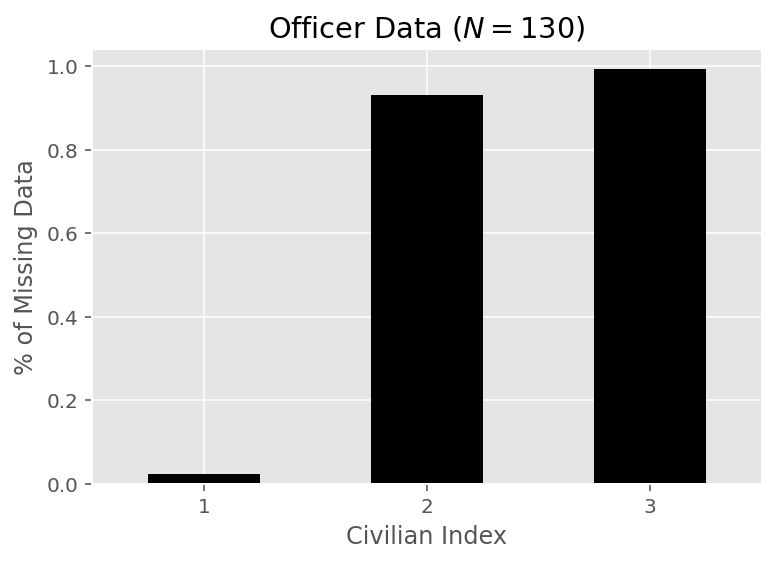

In [11]:
fig, ax = plt.subplots(1, 1)
df_os[cols_civilian_gender].isnull().mean().plot(kind='bar', ax=ax, rot=0, color='black')
xticklabels = [s.split('_')[-1] for s in cols_civilian_gender]
ax.set(ylabel='% of Missing Data', xlabel='Civilian Index', xticklabels=xticklabels, 
       title='Officer Data ($N={}$)'.format(df_os.shape[0]));

## Summary
- The shooter information of both officers and civilians are well documented for the first shooter.
- For both datasets, there are 3 pieces of demographic information of shooters: **age, race, and gender**.

## To do (for now)
- Need to assess the data quality of multi-shooter incidents.
- Check whether the difference in the number of shooters in the form originates from OIS report format or somewhere else.
- Assess the risk of just analyzing the first shooter but ingoring the rest.
- Check whether there is any ordinal nature of the numerical suffix (i.e., does shooter_**1** play a more important role than shooter_**2**?): this may matter if we decide to just use the first shooter information.
- Decide whether to expand our scope to weapon information.